In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [68]:
import warnings

# turn off slice warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [69]:
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
store_format_df = pd.read_parquet('../Data/store_format_agg/store_format_agg.parquet')

In [3]:
store_format_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SHOP_DATE     3276 non-null   object 
 1   STORE_FORMAT  3276 non-null   object 
 2   TOTAL_QTY     3276 non-null   float64
 3   TOTAL_SPEND   3276 non-null   float64
dtypes: float64(2), object(2)
memory usage: 102.5+ KB


In [14]:
# SHOP_DATE should be a date field.
store_format_df['SHOP_DATE'] = pd.to_datetime(store_format_df['SHOP_DATE'])

In [139]:
store_format_df['SHOP_MONTH'] = store_format_df['SHOP_DATE'].dt.month_name()
store_format_df['SHOP_QUARTER'] = store_format_df['SHOP_DATE'].dt.quarter
store_format_df['SHOP_YEAR'] = store_format_df['SHOP_DATE'].dt.year

In [127]:
store_format_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SHOP_DATE     3276 non-null   datetime64[ns]
 1   STORE_FORMAT  3276 non-null   object        
 2   TOTAL_QTY     3276 non-null   float64       
 3   TOTAL_SPEND   3276 non-null   float64       
 4   SHOP_MONTH    3276 non-null   object        
 5   SHOP_YEAR     3276 non-null   int64         
 6   SHOP_QUATER   3276 non-null   int64         
 7   SHOP_QUArTER  3276 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 204.9+ KB


In [128]:
store_format_df.head()

,SHOP_DATE,STORE_FORMAT,TOTAL_QTY,TOTAL_SPEND,SHOP_MONTH,SHOP_YEAR,SHOP_QUATER,SHOP_QUArTER
0,2007-08-31,MS,13711.0,16807.61,August,2007,3,3
1,2007-08-29,SS,5023.0,5868.81,August,2007,3,3
2,2007-03-02,LS,39974.0,49780.98,March,2007,1,1
3,2007-04-22,MS,13154.0,15747.25,April,2007,2,2
4,2007-06-09,MS,12476.0,15635.42,June,2007,2,2


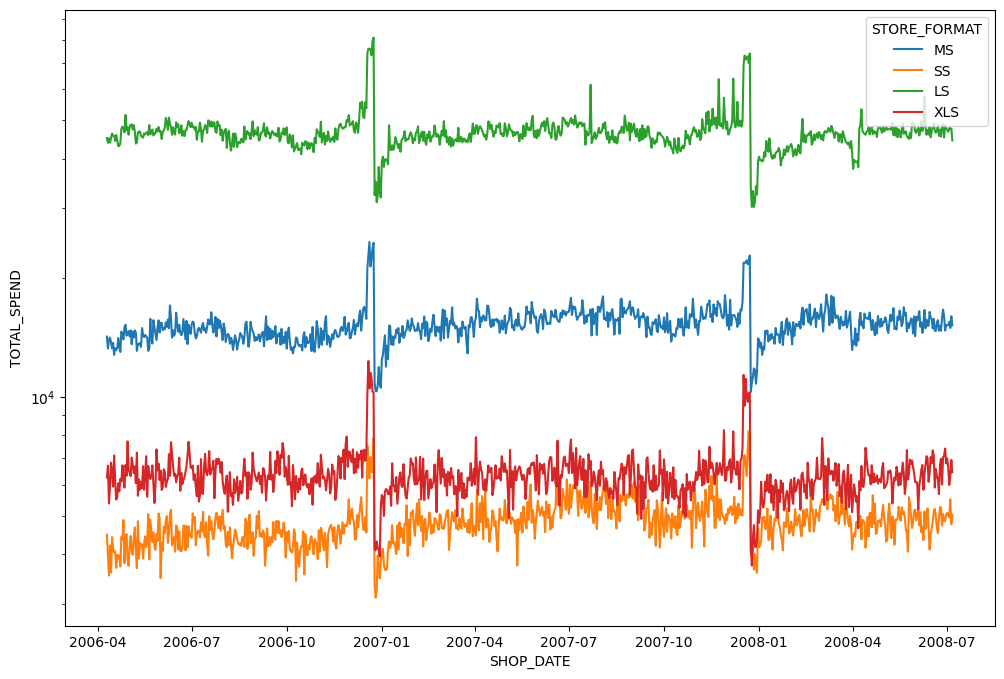

In [129]:
lp = sns.lineplot(data=store_format_df, x='SHOP_DATE', y='TOTAL_SPEND', hue='STORE_FORMAT', estimator='sum')
lp.set_yscale('log')

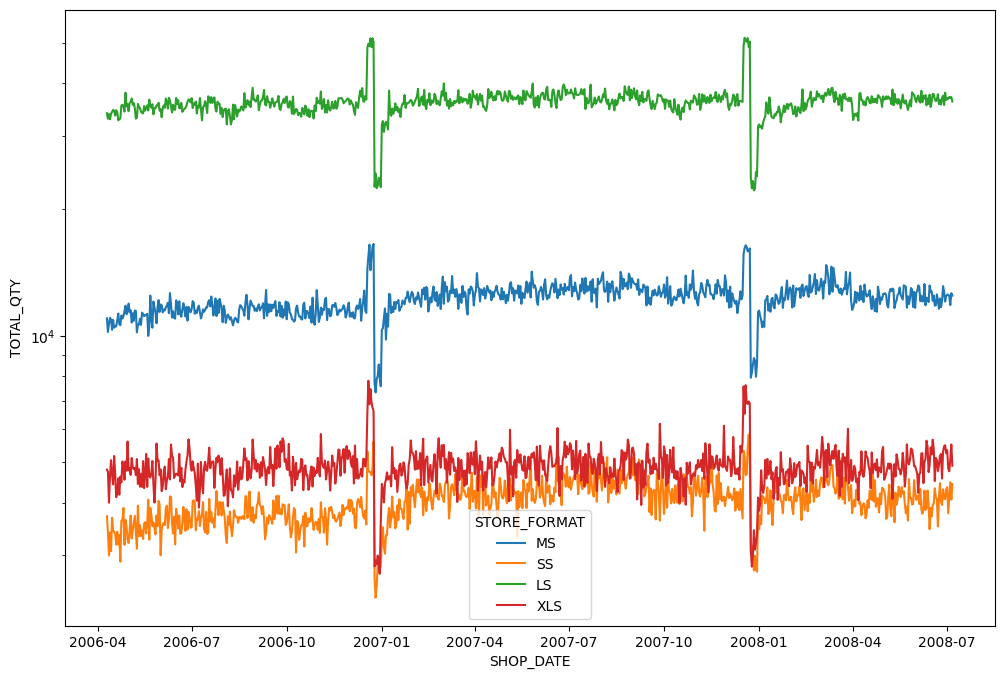

In [130]:
lp = sns.lineplot(data=store_format_df, x='SHOP_DATE', y='TOTAL_QTY', hue='STORE_FORMAT', estimator='sum')
lp.set_yscale('log')

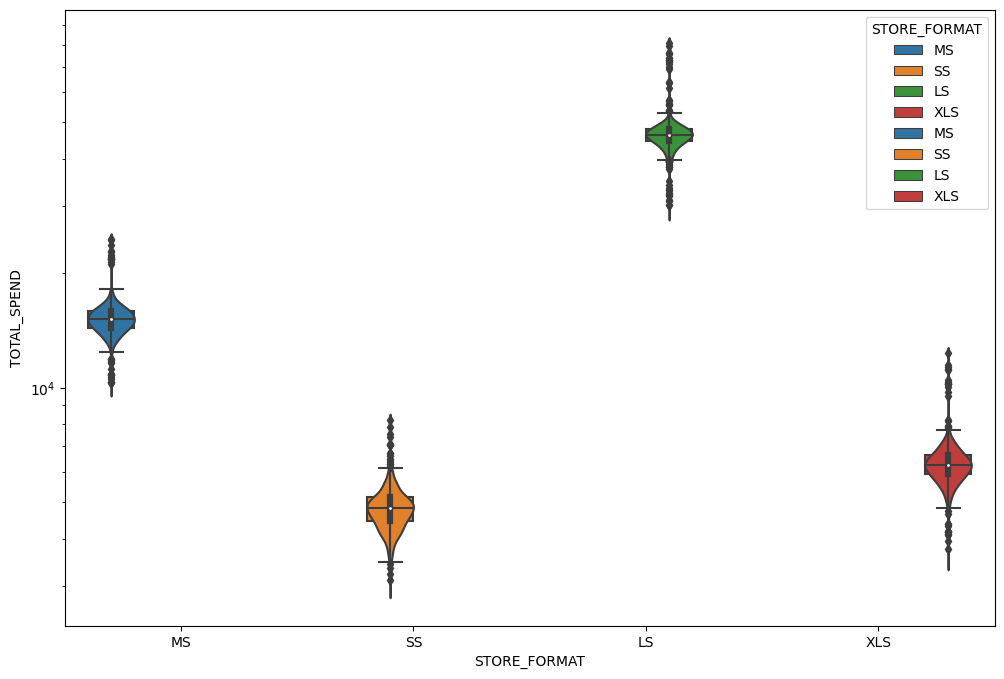

In [131]:
vp = sns.violinplot(data=store_format_df, x='STORE_FORMAT', y='TOTAL_SPEND', hue='STORE_FORMAT')
sns.boxplot(data=store_format_df, x='STORE_FORMAT', y='TOTAL_SPEND', hue='STORE_FORMAT')
vp.set_yscale('log')

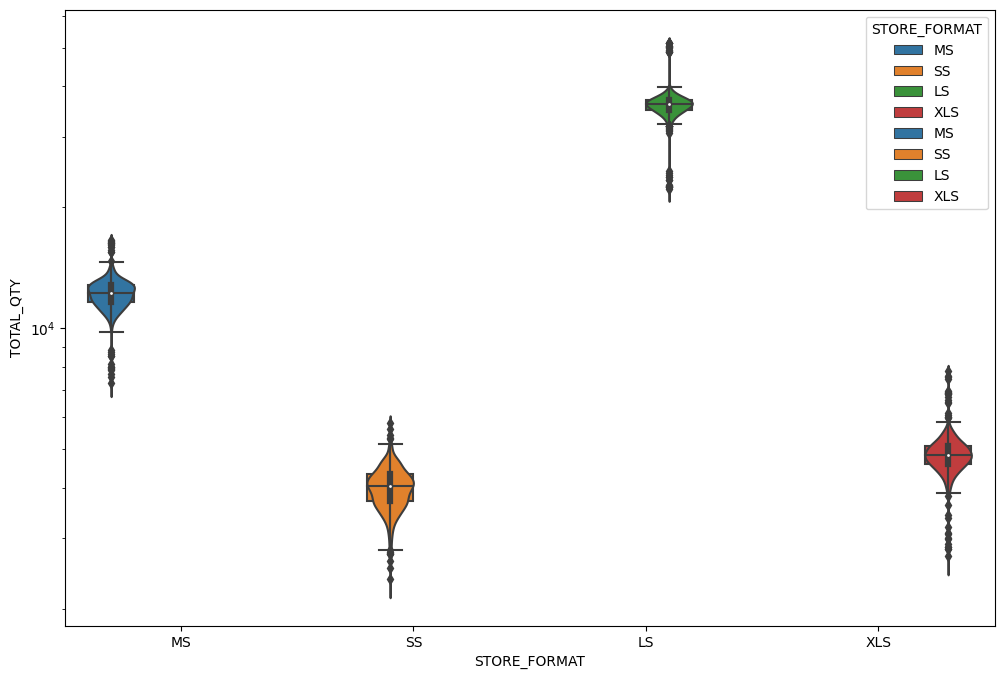

In [132]:
vp = sns.violinplot(data=store_format_df, x='STORE_FORMAT', y='TOTAL_QTY', hue='STORE_FORMAT')
sns.boxplot(data=store_format_df, x='STORE_FORMAT', y='TOTAL_QTY', hue='STORE_FORMAT')
vp.set_yscale('log')

In [133]:
# What are the different types of store format?
store_format_df['STORE_FORMAT'].unique()

array(['MS', 'SS', 'LS', 'XLS'], dtype=object)

In [134]:
def get_sorted_store_format_ts(df, format_type):
    return store_format_df.query(f"STORE_FORMAT == '{format_type}'").sort_values(['SHOP_DATE']).reset_index(drop=True)

In [140]:
store_ss = get_sorted_store_format_ts(store_format_df, 'SS')
store_ms = get_sorted_store_format_ts(store_format_df, 'MS')
store_ls = get_sorted_store_format_ts(store_format_df, 'LS')
store_xls = get_sorted_store_format_ts(store_format_df, 'XLS')

In [136]:
def get_ts_boxplot(df, time_granularity):
    
    bp = sns.boxplot(data=store_ss, x=f'SHOP_{time_granularity}', y='TOTAL_QTY', hue='STORE_FORMAT')

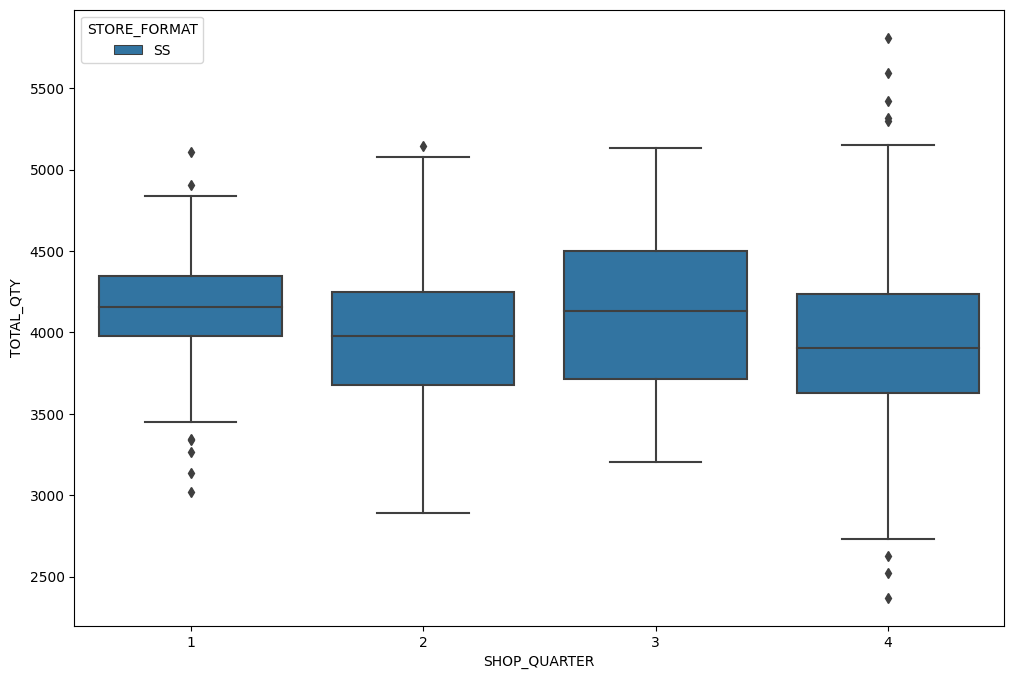

In [141]:
get_ts_boxplot(store_ss, 'QUARTER')